## 1. 회귀문제

In [1]:
# 전처리와 시각화를 회귀문제와 분류문제에 모두 적용하기 위해 클래스를 따로 .py파일에 생성하였음
from dataset import Dataset
import eda

In [2]:
import pymrmr

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tempfile import mkdtemp
from shutil import rmtree
import pprint
import warnings

warnings.filterwarnings(action='ignore')

## Dataset

In [3]:
path = 'dataset/regression'

In [4]:
train_set = Dataset(path, 'X_train')

[X_train]
Size: 2.39 MiB
Number of Features: 123
 |_int64 => 1
 |_float64 => 100
 |_object => 22


In [5]:
test_set = Dataset(path, 'X_test')

[X_test]
Size: 0.80 MiB
Number of Features: 123
 |_int64 => 1
 |_float64 => 100
 |_object => 22


## Preprocessing

TRAIN SET

In [6]:
train_set.data

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,6,0.02,0.72,0.25,0.55,0.20,0.67,0.38,0.59,0.32,...,?,0.08,0.06,0.03,?,?,?,?,0.00,?
1,55,0.01,0.50,0.01,0.99,0.03,0.01,0.39,0.49,0.27,...,?,0.10,0.03,0.04,?,?,?,?,0.00,?
2,34,0.00,0.57,0.03,0.97,0.03,0.02,0.36,0.44,0.26,...,?,0.04,0.05,0.11,?,?,?,?,0.00,?
3,25,0.00,0.64,0.01,0.92,0.29,0.03,0.53,0.41,0.37,...,?,0.05,0.05,0.41,?,?,?,?,0.00,?
4,36,0.00,0.32,0.02,0.98,0.02,0.01,0.36,0.47,0.32,...,?,0.01,0.19,0.04,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,28,0.00,0.55,0.24,0.81,0.03,0.01,0.51,0.45,0.28,...,?,0.03,0.08,0.00,?,?,?,?,0.00,?
1191,5,0.01,0.52,1.00,0.12,0.03,0.01,0.53,0.48,0.28,...,?,0.04,0.08,0.02,?,?,?,?,0.00,?
1192,25,0.11,0.36,0.11,0.83,0.23,0.11,0.34,0.75,0.52,...,0.19,0.01,1.00,1.00,0,0.02,0.86,0,0.46,0.13
1193,54,0.04,0.28,0.03,0.97,0.02,0.00,0.35,0.39,0.26,...,?,0.03,0.25,0.05,?,?,?,?,0.00,?


LemasSwornFT            83.77
LemasSwFTPerPop         83.77
LemasSwFTFieldOps       83.77
LemasSwFTFieldPerPop    83.77
LemasTotalReq           83.77
LemasTotReqPerPop       83.77
PolicReqPerOffic        83.77
PolicPerPop             83.77
RacialMatchCommPol      83.77
PctPolicWhite           83.77
PctPolicBlack           83.77
PctPolicHisp            83.77
PctPolicAsian           83.77
PctPolicMinor           83.77
OfficAssgnDrugUnits     83.77
NumKindsDrugsSeiz       83.77
PolicAveOTWorked        83.77
PolicCars               83.77
PolicOperBudg           83.77
LemasPctPolicOnPatr     83.77
LemasGangUnitDeploy     83.77
PolicBudgPerPop         83.77
dtype: float64


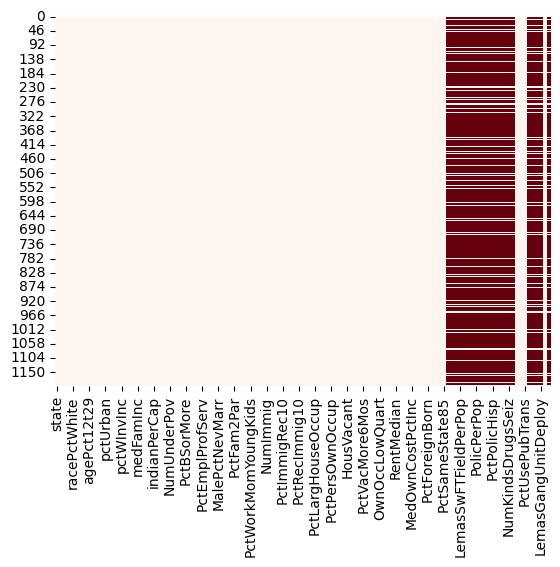

In [7]:
# 결측치가 ?로 들어가있어서 object dtype들을 NaN으로 치환
obj_col = train_set.get_dtype_col_name(dtype='object')
train_set.remove_puct(cols=obj_col, pattern='?')
train_set.check_nans(by_pct=True)

TEST SET

LemasSwornFT            85.21
LemasSwFTPerPop         85.21
LemasSwFTFieldOps       85.21
LemasSwFTFieldPerPop    85.21
LemasTotalReq           85.21
LemasTotReqPerPop       85.21
PolicReqPerOffic        85.21
PolicPerPop             85.21
RacialMatchCommPol      85.21
PctPolicWhite           85.21
PctPolicBlack           85.21
PctPolicHisp            85.21
PctPolicAsian           85.21
PctPolicMinor           85.21
OfficAssgnDrugUnits     85.21
NumKindsDrugsSeiz       85.21
PolicAveOTWorked        85.21
PolicCars               85.21
PolicOperBudg           85.21
LemasPctPolicOnPatr     85.21
LemasGangUnitDeploy     85.21
PolicBudgPerPop         85.21
dtype: float64


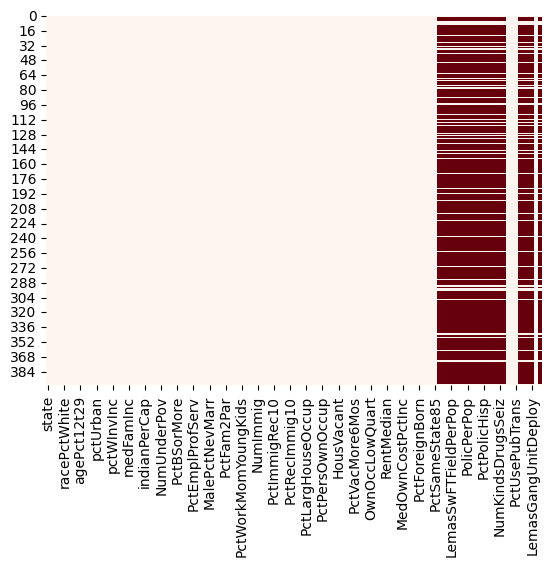

In [8]:
# 결측치가 ?로 들어가있어서 object dtype들을 NaN으로 치환
obj_col = test_set.get_dtype_col_name(dtype='object')
test_set.remove_puct(cols=obj_col, pattern='?')
test_set.check_nans(by_pct=True)

- 결측치가 80%가 넘기 때문에 제거해도 될듯
- `state` 는 명목변수

In [9]:
to_cat_col = 'state'

In [10]:
train_set.data[to_cat_col].nunique()

44

In [11]:
test_set.data[to_cat_col].nunique()

41

- Train과 Test 데이터의 state의 카테고리값의 갯수가 다름!
- 찾아본 결과 Train에만 있는 state 존재
- 일반적인 상황이라면 모르겠지만 원핫인코딩을 해야하면 변수 갯수의 문제가 생기기 때문에 제거 필요
- `train_y`에도 제거 필요

In [12]:
train_state = train_set.data[to_cat_col].unique()

In [13]:
test_state = test_set.data[to_cat_col].unique()

In [14]:
# train set에만 state 50, 11, 2 존재
[i for i in train_state if i not in test_state]

[50, 11, 2]

In [15]:
idx_to_drop = train_set.data.query('state == 2 | state == 11 | state == 50').index

In [16]:
train_set.drop_data(idx_to_drop, axis=0)

Successfully dropped!


In [17]:
train_y = Dataset(path, 'y_train')

[y_train]
Size: 0.01 MiB
Number of Features: 1
 |_float64 => 1


In [18]:
train_y.drop_data(idx_to_drop, axis=0)

Successfully dropped!


Check

In [19]:
train_set.data.query('state == 2 | state == 11 | state == 50')

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop


In [20]:
train_state = train_set.data[to_cat_col].unique()

In [21]:
test_state = test_set.data[to_cat_col].unique()

In [22]:
[i for i in train_state if i not in test_state]

[]

In [23]:
train_y.data.shape

(1188, 1)

Good

In [24]:
encoded_train_X = train_set.get_one_hot_encode([to_cat_col])
encoded_test_X = test_set.get_one_hot_encode([to_cat_col])

In [24]:
encoded_train_X.to_pickle(f'{path}/ohe_train_X.pkl')
encoded_test_X.to_pickle(f'{path}/ohe_test_X.pkl')

In [ ]:
train_y.data.to_pickle(f'{path}/train_y.pkl')

## EDA

In [31]:
train_X = train_set.data
test_X = test_set.data

### train_y

- y값을 log변환 해주는게 좋을것 같음

In [25]:
train_y = pd.read_pickle(f'{path}/train_y.pkl')

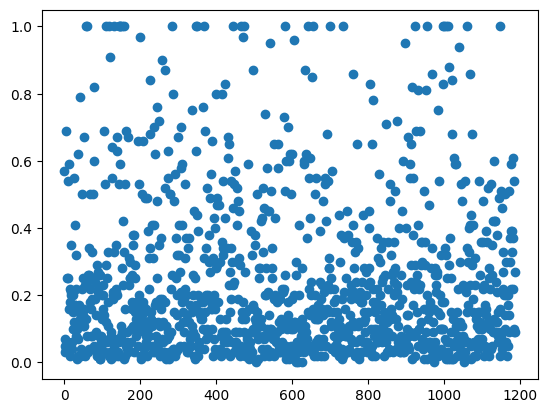

In [26]:
plt.scatter(range(len(train_y)), train_y);

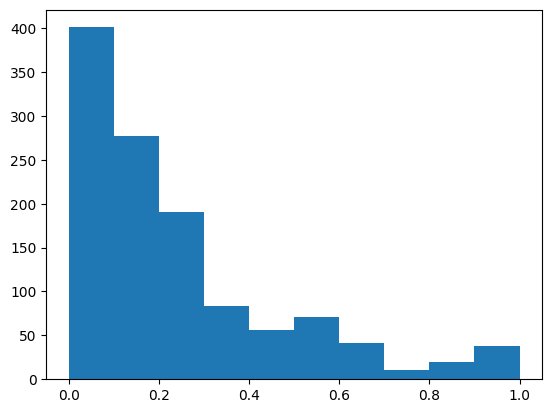

In [27]:
plt.hist(train_y);

### Count by states

state: 41


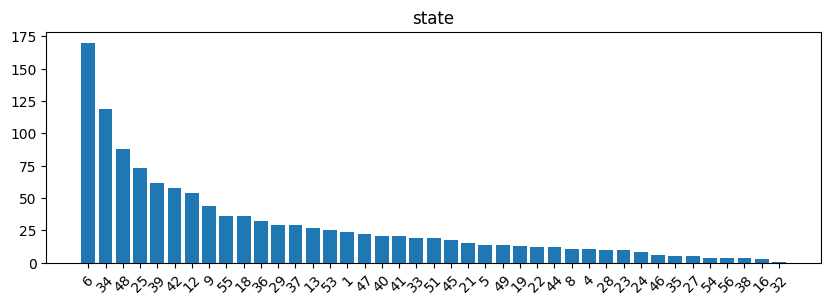

In [32]:
cat_col = train_X.select_dtypes('int').columns
eda.get_categorical_info(train_X, cols=cat_col, figsize=(10, 3), rotation=45)

state: 41


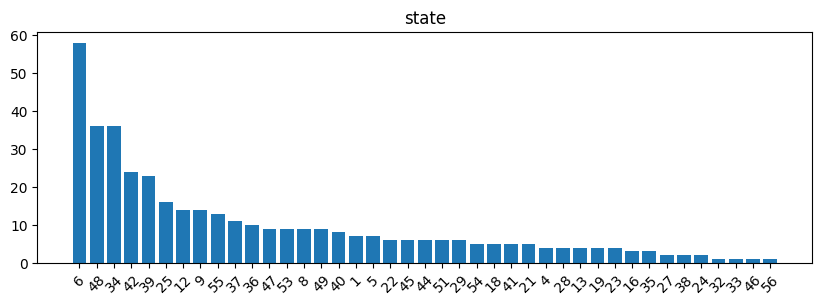

In [33]:
cat_col = test_X.select_dtypes('int').columns
eda.get_categorical_info(test_X, cols=cat_col, figsize=(10, 3), rotation=45)

### Boxplot of each feature

- 변수가 많아서 10개씩 끊어보기
- skewed된 변수들이 많이 보임. y와 exponential한 관계

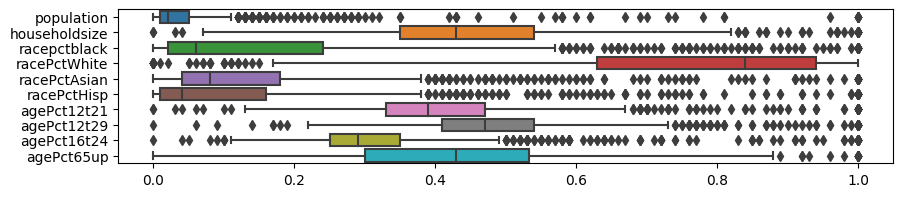

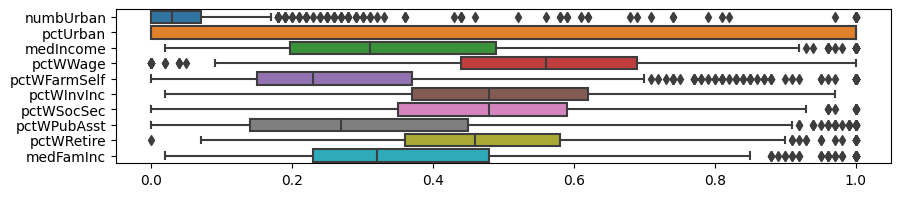

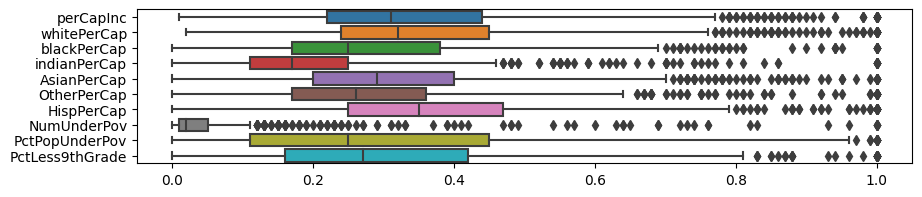

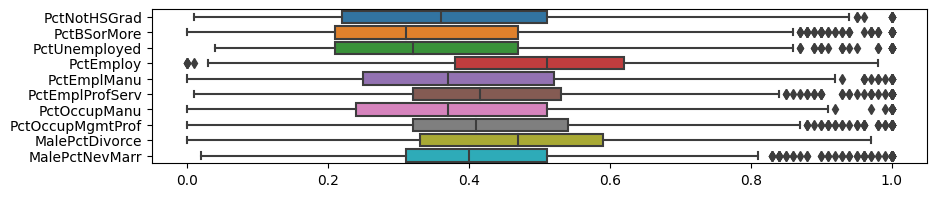

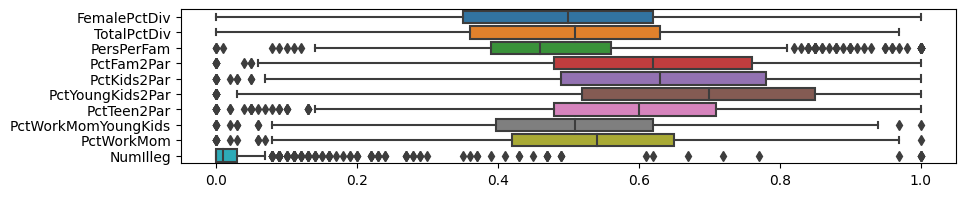

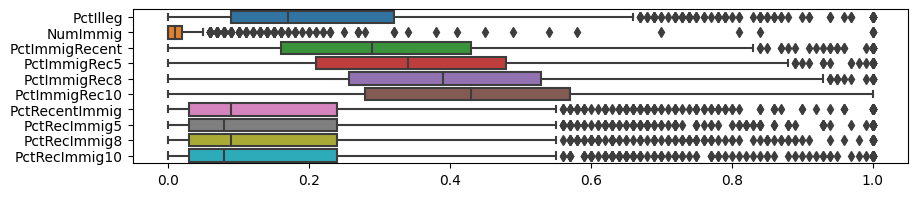

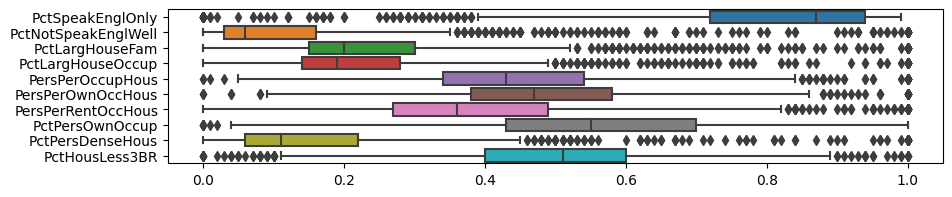

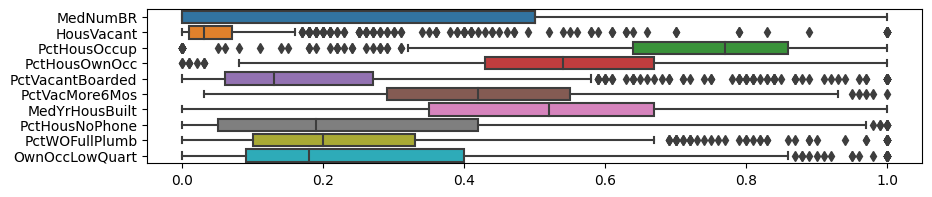

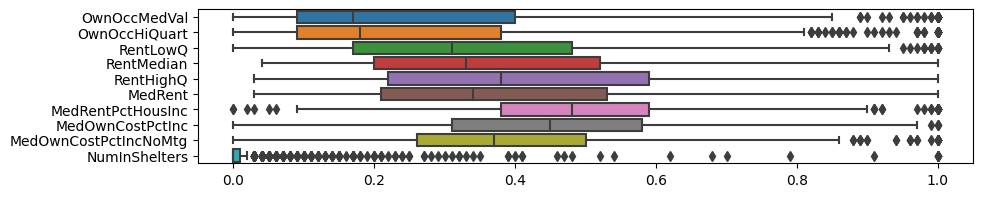

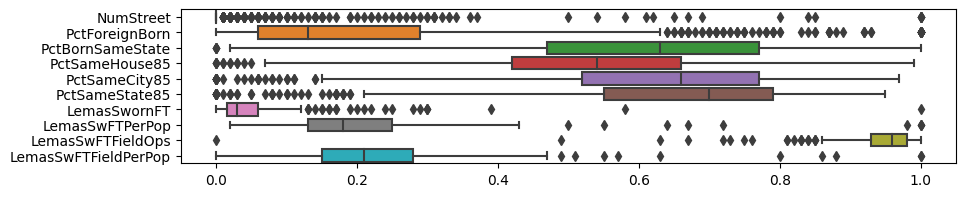

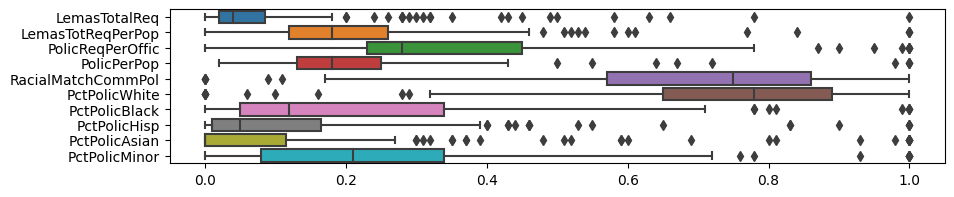

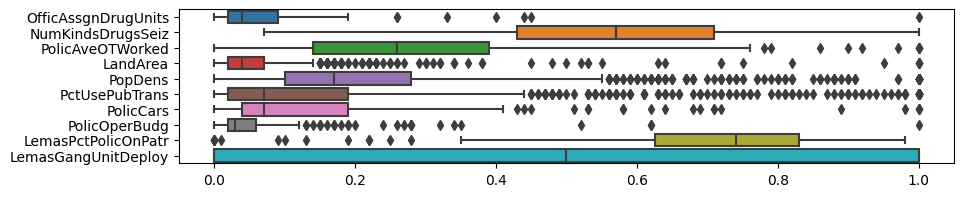

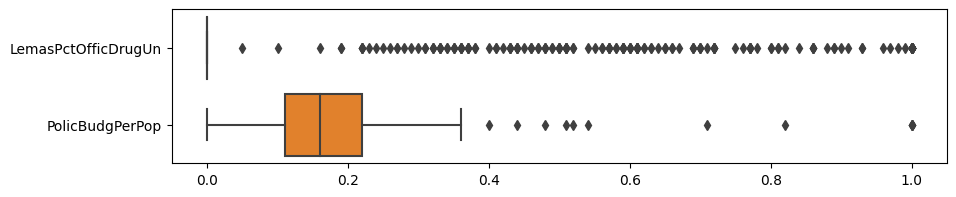

In [34]:
cont_col = train_X.select_dtypes('float')

for i in np.arange(0, len(cont_col.columns), 10):
    eda.plot_cont_boxplot(cont_col.iloc[:, i:i + 10], figsize=(10, 2))

### Correlation between features

- X간에 상관관계가 많이 있지 않아보임
- 변수를 좀더 넉넉하게 사용해도 될듯

In [35]:
org_train = pd.concat([train_y, train_X], axis=1)

In [36]:
org_train = org_train.dropna()
org_train = org_train.drop('state', axis=1)

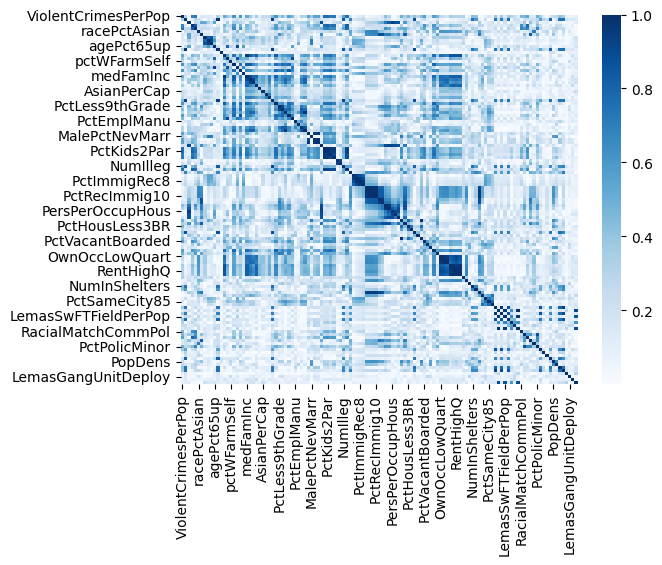

In [37]:
corr_mat = eda.corr_plot(org_train)

## Modeling

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

### Load Dataset

In [39]:
path = 'dataset/regression'

In [40]:
train_X = pd.read_pickle(f'{path}/ohe_train_X.pkl')
test_X = pd.read_pickle(f'{path}/ohe_test_X.pkl')
train_y = pd.read_pickle(f'{path}/train_y.pkl')

In [41]:
na_col_indicator = train_X.isna().any(axis=0).values
na_col_name = train_X.columns[na_col_indicator]

NaN값 제거

In [42]:
train_X = train_X.drop(na_col_name, axis=1)
test_X = test_X.drop(na_col_name, axis=1)

In [43]:
train_X.shape

(1188, 140)

In [44]:
test_X.shape

(399, 140)

### Feature Selection

- mRMR 기법 사용
- 실험적 결과에 따라 하이퍼파라미터들을 설정
- mRMR 기법으로 선택되진 않지만 성능향상을 시킨 `population`, `householdsize` 추가

`state` 명목변수는 feature selection 단계에서 제외

In [45]:
state_col = train_X.filter(like='state').columns
wo_state = train_X.drop(state_col, axis=1)

In [46]:
target = pd.concat([train_y, wo_state], axis=1)

mRMR 기법을 활용하여 변수선택

In [48]:
def get_mrmr_feature(target, feature_num, method: str='MIQ', plot: bool=True):
    mrmr_feature = pymrmr.mRMR(target, method, feature_num)
    if plot:
        mrmr_subset = target[['ViolentCrimesPerPop'] + mrmr_feature]
        corr_mat = eda.corr_plot(mrmr_subset)
    return mrmr_feature

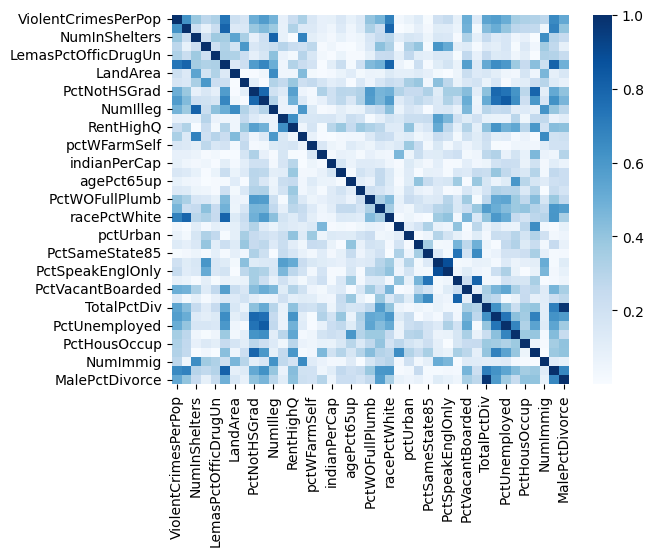

In [49]:
feature_num = 40
mrmr_feature = get_mrmr_feature(target, feature_num, method='MID')

In [50]:
final_feature = mrmr_feature + list(state_col) + ['population', 'householdsize']

In [51]:
train_X = train_X[final_feature]
test_X = test_X[final_feature]

In [52]:
train_X.shape

(1188, 82)

In [53]:
test_X.shape

(399, 82)

### Hyperparameter Tuning

In [85]:
n_splits = 10
n_iter = 100
metric = 'neg_mean_absolute_error'  # MSE

In [23]:
model_list = [
    LinearRegression(),
    Ridge(),
    Lasso(),
]

#### RandomizedSearchCV

- grid search는 오래 걸리기 때문에 random search 채택

In [50]:
%%time
best_params = {}
best_scores = {}

for model in model_list:
    cache_dir = mkdtemp()
    model_name = str(model)
    
    regression = Pipeline(
        [
            ('regression', model),
        ],
        memory=cache_dir,
    )
    ran_params = {
        'regression__alpha': np.arange(0, 1, 0.01),
        'regression__max_iter': np.arange(100, 2000, 100),
    }
    cv = KFold(n_splits, shuffle=True)
    
    if model_name == 'LinearRegression()':
        res = cross_validate(regression, train_X, np.log1p(train_y), cv=cv, scoring=metric)
        mse = res['test_score'] * -1
        mse_avg = np.mean(mse)
        best_scores[model_name] = mse_avg
    else:
        search = RandomizedSearchCV(
            estimator=regression,
            param_distributions=ran_params,
            n_iter=n_iter,
            scoring=metric,
            n_jobs=-1,
            cv=cv,
        )
        
        search.fit(train_X, np.log1p(train_y))

        best_params[model_name] = search.best_params_
        best_scores[model_name] = search.best_score_ * -1
    rmtree(cache_dir)

now = pd.Timestamp.now().strftime('%Y-%m-%d %X')
timeline = f'[{now}]'
print(timeline)
print('='*len(timeline))
for e in [best_params, best_scores]:
    pprint.pprint(e, width=1)

[2023-04-18 19:04:22]
{'Lasso()': {'regression__alpha': 0.02,
             'regression__max_iter': 1500},
 'Ridge()': {'regression__alpha': 0.97,
             'regression__max_iter': 1100}}
{'Lasso()': 0.1349521288818983,
 'LinearRegression()': 0.09827403207329884,
 'Ridge()': 0.09637807301859495}
CPU times: total: 734 ms
Wall time: 3.39 s


### Prediction

- train_y가 positive skew하기 때문에 log변환 시켜주었음

In [53]:
def predict(model, train_X, train_y, test_X, log_transform: bool=False):
    if log_transform:
        train_y = np.log1p(train_y)
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    if log_transform:
        pred = np.expm1(pred)  # train_y를 log 변환하여 예측한 값이니 다시 되돌려주기
    return pred

#### MLR

In [64]:
mlr = LinearRegression()
mlr_pred = predict(mlr, train_X, train_y, test_X, log_transform=True)

#### Ridge

In [65]:
ridge = Ridge(alpha=0.97, max_iter=1100)
ridge_pred = predict(ridge, train_X, train_y, test_X, log_transform=True)

#### Lasso

In [66]:
lasso = Ridge(alpha=0.02, max_iter=1500)
lasso_pred = predict(lasso, train_X, train_y, test_X, log_transform=True)

### Submission File

In [ ]:
mlr_submit = pd.DataFrame(lr_pred, columns=['MLR 예측'])
lasso_submit = pd.DataFrame(lasso_pred, columns=['Lasso 예측'])
ridge_submit = pd.DataFrame(ridge_pred, columns=['Ridge 예측'])

In [6]:
regression_pred = pd.concat([mlr_submit, lasso_submit, ridge_submit], axis=1)
regression_pred.to_csv('prediction/regression_pred.csv', index=False)